<a href="https://colab.research.google.com/github/mishenkoil/optimization-methods/blob/main/met_opt_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pylab
import math
%matplotlib inline

# **Отчет по лабораторной работе №4**
Учебная дисциплина: **Методы оптимизации** <br>
Тема работы: **Метод Ньютона и его модификации** <br>
Вариант: **1** <br>
<br>
[*Исходный код*](https://github.com/Rytuo/MetOpt/tree/master/lab4) <br>
Преподаватель: ***Свинцов Михаил*** <br>
Работу выполнили: ***Мищенко Илья, Мороз Николай, Попов Александр.***
<br>
<br>
*Университет ИТМО* <br>
*Факультет информационных технологий и программирования* <br>
*Направление "Прикладная математика и информатика"* <br>
<br>
*2021 год* 

# **Постановка задачи**
1.   Реализовать **метод Ньютона**: **(A)** классический, **(B)** с одномерным поиском, **(C)** с направлением спуска.

    1.1   Продемонстрировать работу методов на 2-3 функциях, в том числе на не квадратичных.
  * Для поиска ньютоновского направления спуска использовать прямой или итерационный метод решения СЛАУ.
  * Результаты иллюстровать траекториями спуска.
  * Указать количество итераций, необходимых для достижения заданной точности.
  * В случае одномерного поиска указать найденные значения параметра.
  * Провести исследование влияние выбора начального приближения на результат (не менее трех).

    1.2   Исследовать работу методов на двух функциях с заданным начальным приближением:
> $$f(x) = x_1^2 +x_2^2 - 1.2x_1x_2,  \thinspace x^0 = (4, 1)^T$$ <br>
$$ f(x) = 100(x_2 - x_1^2)^2 + (1 - x_1)^2,  \thinspace x^0 = (-1.2, 1)^T $$

  * Для поиска ньютоновского направления спуска использовать прямой или итерационный метод решения СЛАУ
  * Сравните результаты с минимизацией методом наискорейшего спуска из лабораторной работы №2.
  * Построить таблицу или график зависимости "метод – количество итераций".
  * Для каждого метода привести иллюстрации траекторий сходимости.

2.   Реализовать **метод Давидона-Флетчера-Пауэлла и метод Пауэлла**. **Сравнить** работу данных квазиньютоновских методов **с наилучшим методом Ньютона** (по результатам п.1) на функциях:
> $$f(x) = 100(x_2 - x_1^2)^2 + (1-x_1)^2$$ <br>
$$f(x) = (x_1^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2$$ <br>
$$f(x) = (x_1 +10x_2)^2 + 5(x_3 - x_4)^2 + (x_2 - 2x_3)^4 + 10(x_1 - x_4)^4$$ <br>
$$f(x) = 100 - \frac{2}{1 + (\frac{x_1 - 1}{2})^2 + (\frac{x_2 - 1}{3})^2} - \frac{1}{1 + (\frac{x_1 - 2}{2})^2 + (\frac{x_2 - 1}{8})^2}$$

  * Для каждого метода привести иллюстрации траекторий сходимости.
  * Провести исследование влияние выбора начального приближения на результат, оценить скорость сходимости.
  * Построить таблицу или график зависимости "метод : количество итераций".




# **Анализ траектории методов**



In [ ]:
def makeData(zgrid, size):
    x = np.arange(-size, size, size / 10.0)
    y = np.arange(-size, size, size / 10.0)
    xgrid, ygrid = np.meshgrid(x, y)

    return xgrid, ygrid, zgrid(xgrid,ygrid)

def parse_points(source):
  df = pd.read_csv(source)
  x_1, x_2 = [], []
  for i in df['current x']:
    a, b = map(float, i[1:-1].split(','))
    x_1.append(a)
    x_2.append(b)
  return x_1, x_2

def make_contour(zgrid, start, size, link1, link2, link3):
  pylab.figure(figsize=(24, 6));
  x, y, z = makeData(zgrid, size)

  # !!! Текущая ячейка - 1
  pylab.subplot (1, 3, 1)
  x_1, x_2 = parse_points(link1)
  pylab.plot(x_1, x_2, 'ro-')
  pylab.contour(x, y, z)
  pylab.title ('Start point: ' + start + ', case  A')

  # !!! Текущая ячейка - 2
  pylab.subplot (1, 3, 2)
  x_1, x_2 = parse_points(link2)
  pylab.plot(x_1, x_2, 'ro-')
  pylab.contour(x, y, z)
  pylab.title ('Start point: ' + start + ', case   B')
  # print('ALPHA COEFS IN B', pd.read_csv(link2)['alpha'], sep='\n')

  # !!! Текущая ячейка - 3
  pylab.subplot (1, 3, 3)
  x_1, x_2 = parse_points(link3)
  pylab.plot(x_1, x_2, 'ro-')
  pylab.contour(x, y, z)
  pylab.title ('Start point: ' + start + ', case   C')
  # print('ALPHA COEFS IN C', pd.read_csv(link3)['alpha'], '+----------------------------+', sep='\n')

def solo_contour(zgrid, start, size, link1):
  pylab.figure(figsize=(8, 6));
  x, y, z = makeData(zgrid, size)

  # !!! Текущая ячейка - 1
  x_1, x_2 = parse_points(link1)
  pylab.plot(x_1, x_2, 'ro-')
  pylab.contour(x, y, z)
  pylab.title ('x0 = ' + start + '   Descent')

  return pylab

def print_table(link1, link2="", link3=""):
  if not(link2 and link3):
    df = pd.read_csv(link1)
    print('Descent step-by-step table', df.head(500), '+-------------------------------+', sep='\n')
    return;

  df = pd.read_csv(link1)
  print('A case step-by-step table', df.head(500), '+-------------------------------+', sep='\n')
  df = pd.read_csv(link2)
  print('B case step-by-step table', df.head(500), '+-------------------------------+', sep='\n')
  df = pd.read_csv(link3)
  print('C case step-by-step table', df.head(500), '+-------------------------------+', sep='\n')
  

## **Методы Ньютона на произвольных функциях**

Здесь и далее будет использована точность $\varepsilon = 10^{-8}$

1.   $f(x) = x_1^2 + x_2^2, x^0=(5,5)$

A case step-by-step table
  current x
0    (5, 5)
1    (0, 0)
+-------------------------------+
B case step-by-step table
                                           current x     alpha
0                                             (5, 5)  1.000000
1  (-1.7763568394002505e-14, -1.7763568394002505e...  1.000001
+-------------------------------+
C case step-by-step table
  current x      alpha
0    (5, 5)   0.500000
1    (0, 0) -99.999987
+-------------------------------+


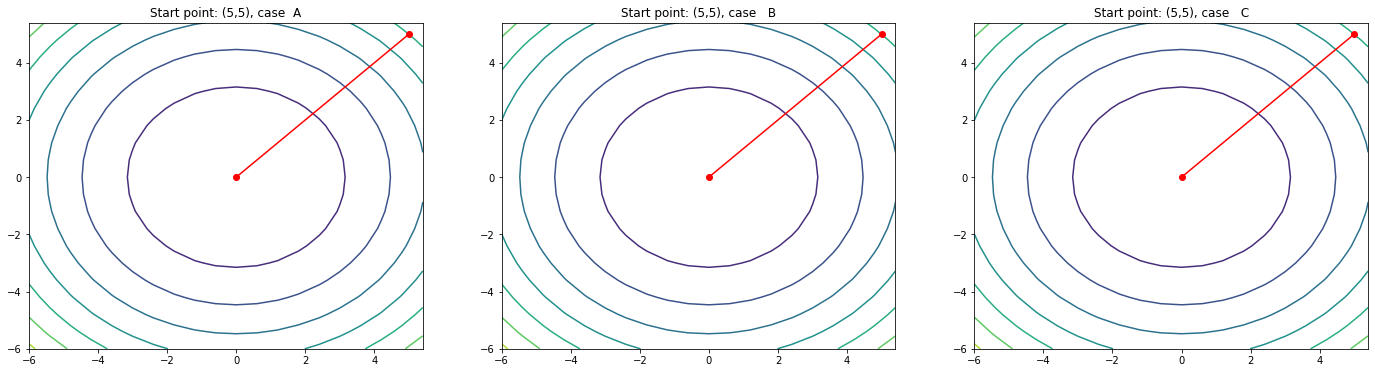

In [ ]:
print_table('https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/own_function_1_classic.csv',
            'https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/own_function_1_1d.csv',
            'https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/own_function_1_descent.csv')

make_contour(lambda x, y: x ** 2 + y ** 2,
             '(5,5)',
             6, 
            "https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/own_function_1_classic.csv",
            "https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/own_function_1_1d.csv",
            "https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/own_function_1_descent.csv")


**На квадратичных функциях, метод Ньютона должен сходится за одну итерацию. В нашем случае так и происходит.**

2.   $f(x,y) = 2x_1^2 + 2x_2^2+5x_1-5x_2+10, x_0=(5,5)$

A case step-by-step table
       current x
0         (5, 5)
1  (-1.25, 1.25)
+-------------------------------+
B case step-by-step table
  current x      alpha
0    (5, 5)   1.000000
1    (0, 0) -99.999987
+-------------------------------+
C case step-by-step table
                                   current x      alpha
0                                     (5, 5)   0.250000
1  (-1.2499999999999112, 1.2500000000000533)  51.872019
+-------------------------------+


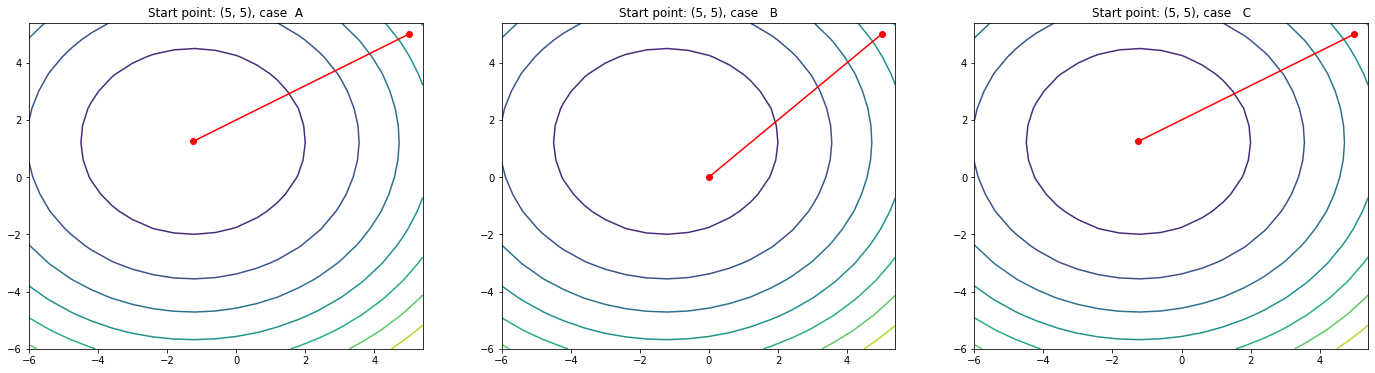

In [ ]:
print_table("https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/own_function_2_classic.csv",
            "https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/own_function_2_1d.csv",
            "https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/own_function_2_descent.csv")

make_contour(lambda x, y: 2 * x ** 2 + 2 * y ** 2 + 5 * x - 5 * y + 10,
             '(5, 5)', 
             6,
            "https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/own_function_2_classic.csv",
            "https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/own_function_2_1d.csv",
            "https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/own_function_2_descent.csv")

**Аналогично предыдущему примеру**

3. $f(x) = ln(x_1^2 + x_2^2 + 1), x^0=(0.5, 0.5), (0.05, 0.05), (0.00005, 0.00005)$

***(смотрим на поведение алгоритма при различных приближениях)***

A case step-by-step table
                                             current x
0                                           (0.5, 0.5)
1           (-0.9999988750014062, -0.9999988750014059)
2             (-4.000003375005907, -4.000003375005906)
3             (-8.258071562692244, -8.258071562692244)
4           (-16.638106261774464, -16.638106261774464)
..                                                 ...
96      (-8.25879297600924e+28, -8.25879297600924e+28)
97   (-1.6517586654519037e+29, -1.6517586654519037e...
98   (-3.3035151479034495e+29, -3.3035151479034495e...
99    (-6.607033569415586e+29, -6.607033569415586e+29)
100  (-1.3214070412439858e+30, -1.3214070412439858e...

[101 rows x 1 columns]
+-------------------------------+
B case step-by-step table
                                           current x      alpha
0                                         (0.5, 0.5)   0.333334
1  (-2.0625723351486158e-11, -2.0625612329183696e... -99.999987
+-------------------------------+
C ca

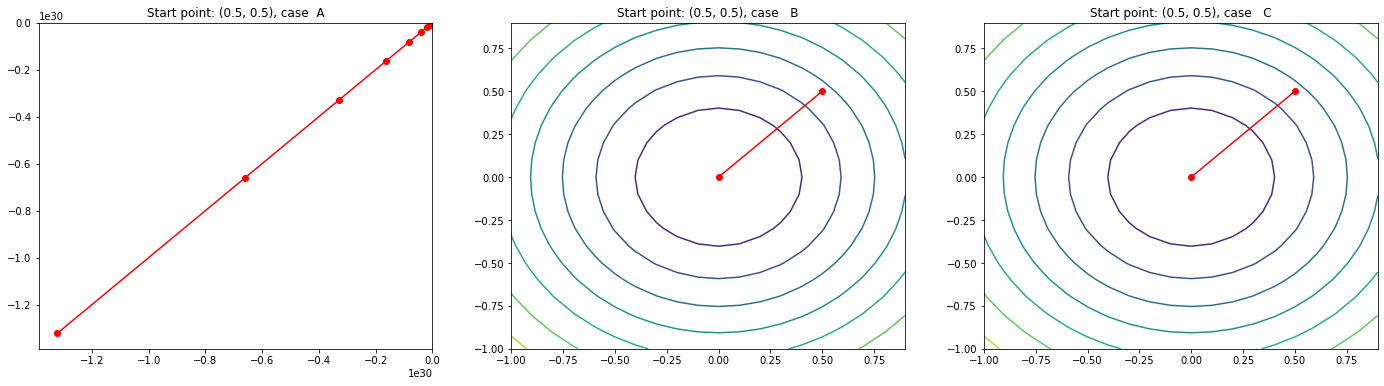

In [ ]:
# X0 = (0.5, 0.5)

print_table("https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/own_function_3_1_classic.csv",
            "https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/own_function_3_1_1d.csv",
            "https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/own_function_3_1_descent.csv")

make_contour(lambda x, y: np.log(x ** 2 + y ** 2 + 1), 
             '(0.5, 0.5)',
             1,
            "https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/own_function_3_1_classic.csv",
            "https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/own_function_3_1_1d.csv",
            "https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/own_function_3_1_descent.csv")

A case step-by-step table
                                        current x
0                                    (0.05, 0.05)
1  (-0.000502493529689188, -0.000502493529689195)
2  (1.724070915112147e-09, 1.724070908173253e-09)
+-------------------------------+
B case step-by-step table
                                       current x     alpha
0                                   (0.05, 0.05)  0.990050
1  (5.533743803465274e-09, 5.53374379652638e-09)  0.998172
+-------------------------------+
C case step-by-step table
                                          current x     alpha
0                                      (0.05, 0.05)  0.502500
1  (-5.999780443299851e-09, -5.999780443299851e-09)  0.979868
+-------------------------------+


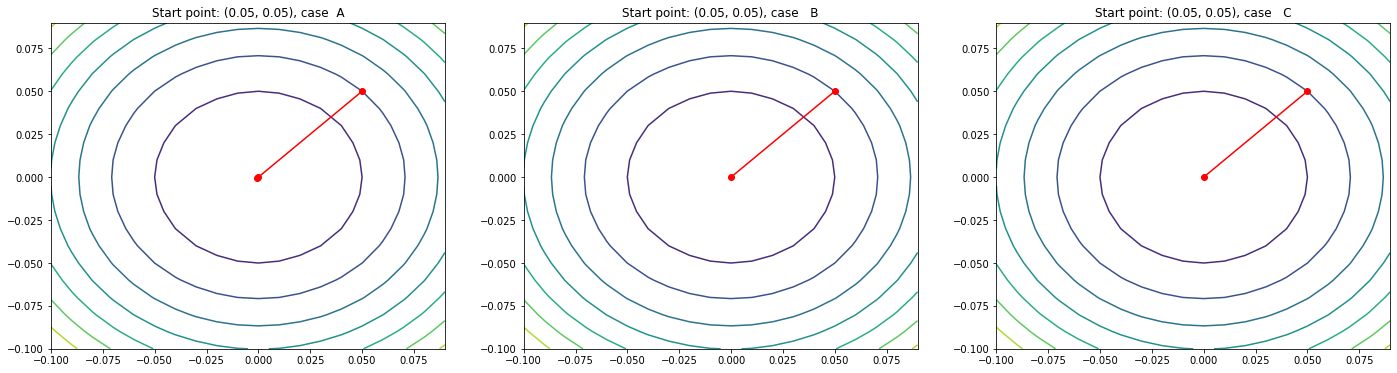

In [ ]:
# X0 = (0.05, 0.05)

print_table("https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/own_function_3_2_classic.csv",
            "https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/own_function_3_2_1d.csv",
            "https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/own_function_3_2_descent.csv")

make_contour(lambda x, y: np.log(x ** 2 + y ** 2 + 1), 
             '(0.05, 0.05)',
             0.1,
            "https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/own_function_3_2_classic.csv",
            "https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/own_function_3_2_1d.csv",
            "https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/own_function_3_2_descent.csv")

A case step-by-step table
                                          current x
0                                    (5e-05, 5e-05)
1  (-2.499999990010493e-13, -2.499999990010493e-13)
+-------------------------------+
B case step-by-step table
                                        current x      alpha
0                                  (5e-05, 5e-05)   0.999999
1  (6.313972982690055e-11, 6.313972982690055e-11) -99.999987
+-------------------------------+
C case step-by-step table
                                        current x      alpha
0                                  (5e-05, 5e-05)   0.499997
1  (2.685496669537087e-10, 2.685496669537087e-10) -23.606795
+-------------------------------+


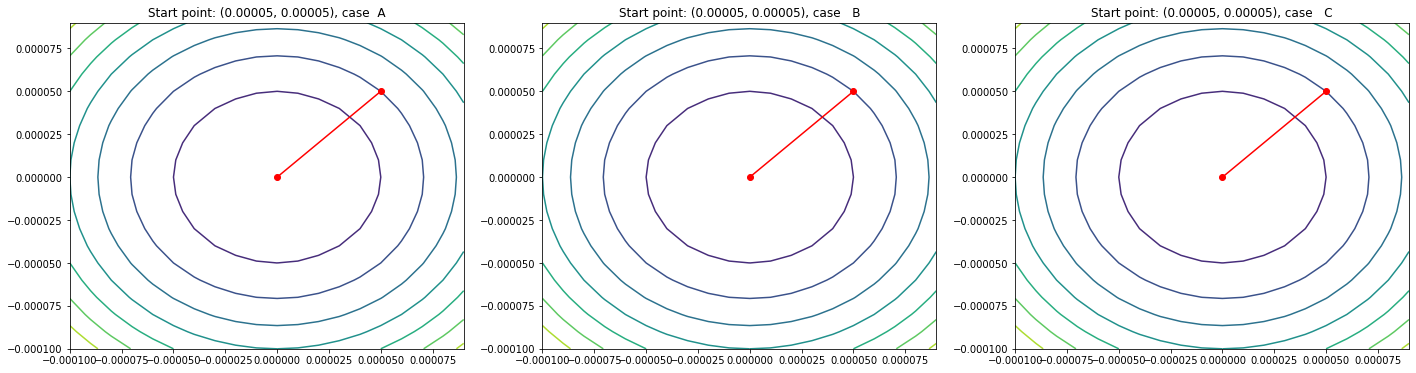

In [ ]:
# X0 = (0.00005, 0.00005)

print_table("https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/own_function_3_3_classic.csv",
            "https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/own_function_3_3_1d.csv",
            "https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/own_function_3_3_descent.csv")

make_contour(lambda x, y: np.log(x ** 2 + y ** 2 + 1), 
             '(0.00005, 0.00005)',
             0.0001,
            "https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/own_function_3_3_classic.csv",
            "https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/own_function_3_3_1d.csv",
            "https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/own_function_3_3_descent.csv")

**Было проведено три теста для каждого метода с начальными точками (0.5, 0.5), (0.05, 0.05), (0.00005, 0.00005). В первом случае, классический метод Ньюьтона расходится, такое случается, если начальное приближение недостаточно близко к решению.** 

## **Метод Ньютона на заданных функциях** 

1.    $f(x) = x_1^2 +x_2^2 - 1.2x_1x_2,  \thinspace x^0 = (4, 1)^T$

*Метод Ньютона*

A case step-by-step table
                     current x
0                       (4, 1)
1  (0, -2.220446049250313e-16)
+-------------------------------+
B case step-by-step table
                     current x  alpha
0                       (4, 1)    1.0
1  (0, -2.220446049250313e-16)    1.0
+-------------------------------+
C case step-by-step table
                                         current x     alpha
0                                           (4, 1)  0.351498
1         (1.6098169717138293, 1.9841930116472468)  0.999999
2  (6.364387341584177e-07, -2.620623476001782e-07)  1.000001
3  (4.0173540212981563e-13, 4.951622401040463e-13)  1.000000
+-------------------------------+


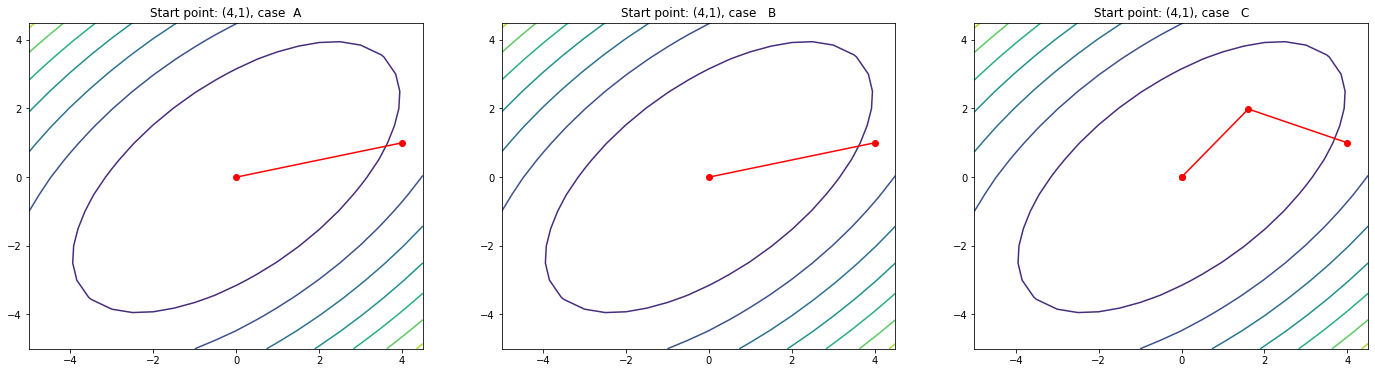

In [ ]:
print_table("https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/given_function_1_classic.csv",
            "https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/given_function_1_1d.csv",
            "https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/given_function_1_descent.csv")

make_contour(lambda x, y: x ** 2 + y ** 2 - 1.2 * x * y,
             '(4,1)',
             5, 
            "https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/given_function_1_classic.csv",
            "https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/given_function_1_1d.csv",
            "https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/given_function_1_descent.csv")


**Поведение методов аналогично поведению методов на квадратичных функциях из предыдущего пункта.**

*Метод наискорейшего спуска из lab2*

Descent step-by-step table
                   current x
0   (4.00000000, 1.00000000)
1   (1.60982030, 1.98419164)
2   (0.88376483, 0.22093736)
3   (0.35567549, 0.43838795)
4   (0.19525692, 0.04881177)
5   (0.07858175, 0.09685579)
6   (0.04313907, 0.01078405)
7   (0.01736145, 0.02139874)
8   (0.00953077, 0.00238246)
9   (0.00383567, 0.00472762)
10  (0.00210562, 0.00052634)
11  (0.00084741, 0.00104446)
12  (0.00046518, 0.00011628)
13  (0.00018721, 0.00023075)
14  (0.00010277, 0.00002569)
15  (0.00004136, 0.00005098)
16  (0.00002270, 0.00000568)
17  (0.00000914, 0.00001126)
18  (0.00000502, 0.00000125)
19  (0.00000202, 0.00000249)
20  (0.00000111, 0.00000028)
21  (0.00000045, 0.00000055)
22  (0.00000045, 0.00000055)
+-------------------------------+


<module 'pylab' from '/usr/local/lib/python3.7/dist-packages/pylab.py'>

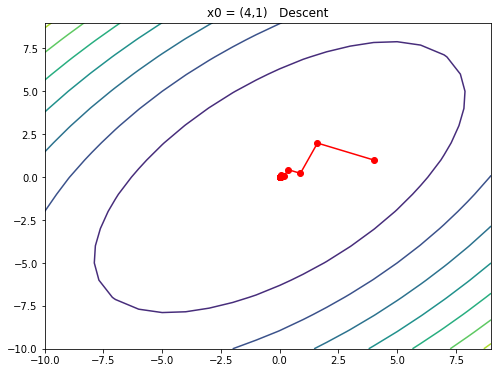

In [ ]:
print_table("https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/steepest_descent1.csv")
solo_contour(lambda x, y: x ** 2 + y ** 2 - 1.2 * x * y,
             '(4,1)',
             10, 
            "https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/steepest_descent1.csv")

2.    $ f(x) = 100(x_2 - x_1^2)^2 + (1 - x_1)^2,  \thinspace x^0 = (-1.2, 1)^T $

*Метод Ньютона*

A case step-by-step table
                                   current x
0                                  (-1.2, 1)
1  (-1.1752808988764043, 1.3806741573033707)
2  (0.7638734681418828, -3.1768134966351353)
3   (0.7641858503625089, 0.5839787437405155)
4   (0.9997610307809855, 0.9440260523917027)
5   (0.9997805508181543, 0.9995610830964223)
6   (0.9999998945580671, 0.9999997407630025)
7   (0.9999999999880671, 0.9999999999761524)
+-------------------------------+
B case step-by-step table
                                       current x     alpha
0                                      (-1.2, 1)  1.004185
1       (-1.175177439066649, 1.3822674383736042)  0.074676
2       (-0.959501342134088, 0.8752605356662512)  1.386992
3      (-0.6897612231728014, 0.4205728004364117)  2.535878
4      (-0.3338684204655642, 0.0695856651675838)  1.989845
5   (-0.05079799566311566, -0.03609077946088757)  2.408407
6      (0.2389523731439545, 0.02760774444621858)  2.204474
7      (0.4821651297804409, 0.2088512

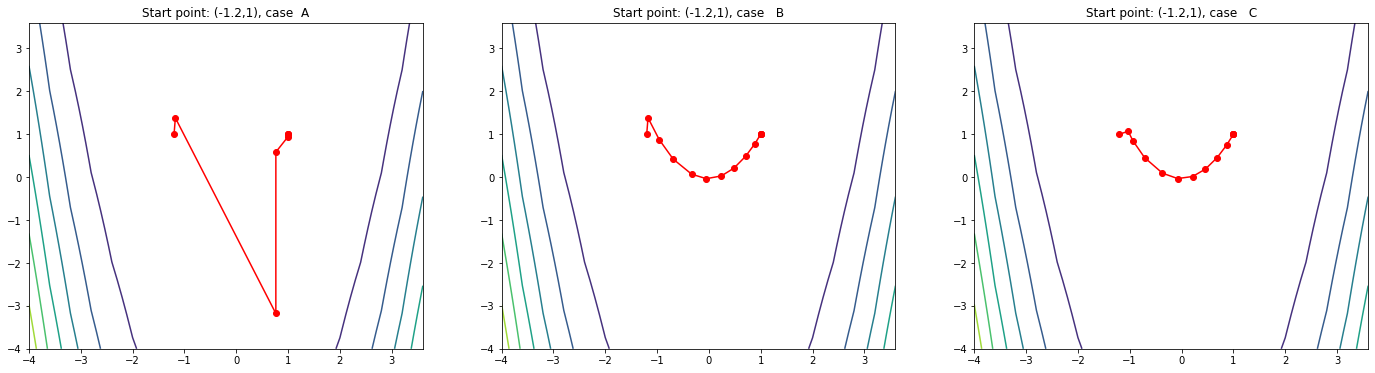

In [ ]:
print_table("https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/given_function_2_classic.csv",
            "https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/given_function_2_1d.csv",
            "https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/given_function_2_descent.csv")

make_contour(lambda x, y: 100 * (y - x ** 2) ** 2 + (1 - x) ** 2,
             '(-1.2,1)',
             4, 
            "https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/given_function_2_classic.csv",
            "https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/given_function_2_1d.csv",
            "https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/given_function_2_descent.csv")


*Метод наискорейшего спуска из lab2*

Descent step-by-step table
                    current x
0    (4.00000000, 1.00000000)
1   (-1.28987902, 1.66106961)
2    (1.37920478, 1.90363118)
3    (1.37929214, 1.90273962)
4   (-1.27809005, 1.64209776)
..                        ...
95   (1.02427355, 1.04919019)
96  (-0.61098950, 0.38319613)
97  (-0.59305815, 0.33916736)
98   (0.99243138, 0.98487669)
99   (0.99242634, 0.98489777)

[100 rows x 1 columns]
+-------------------------------+


<module 'pylab' from '/usr/local/lib/python3.7/dist-packages/pylab.py'>

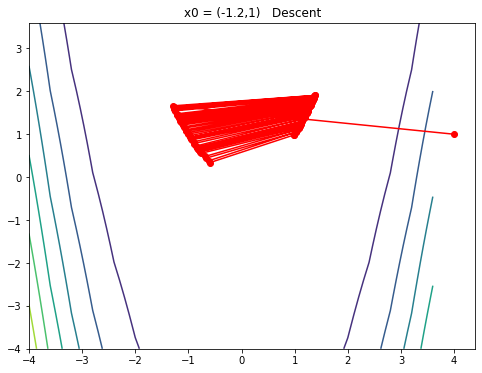

In [ ]:
print_table("https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/steepest_descent2.csv")
solo_contour(lambda x, y: 100 * (y - x ** 2) ** 2 + (1 - x) ** 2,
             '(-1.2,1)',
             4, 
            "https://raw.githubusercontent.com/mishenkoil/optimization-methods/main/output/steepest_descent2.csv")



---



|                |  Iterations (f1/f2)  |
|----------------|----|
|classic newton  |2 / 7 |
|1d search newton|2 / 13 |
|descent newton  |4 / 13 |
|descent         |22 / 99|



---



*   **Эффективней всего себя показал классический метод Ньютона.**
*   **На квадратичных функциях лучше использовать один из методов Ньютона.**
*   **Ньютон с направлением спуска в меньшей степени зависит от начального приближения.**

***в дальнейших экспериментах будем использовать классический метод Ньютона***



---




## **Сравнение метода Давидона-Флетчера-Пауэлла и метода Пауэлла с наилучшим методом из п.1**

$$f(x) = 100(x_2 - x_1^2)^2 + (1-x_1)^2$$ <br>
$$f(x) = (x_1^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2$$ <br>
$$f(x) = (x_1 +10x_2)^2 + 5(x_3 - x_4)^2 + (x_2 - 2x_3)^4 + 10(x_1 - x_4)^4$$ <br>
$$f(x) = 100 - \frac{2}{1 + (\frac{x_1 - 1}{2})^2 + (\frac{x_2 - 1}{3})^2} - \frac{1}{1 + (\frac{x_1 - 2}{2})^2 + (\frac{x_2 - 1}{8})^2}$$

1.   $f(x) = 100(x_2 - x_1^2)^2 + (1-x_1)^2, \thinspace x^0 = (0, 0)^T$



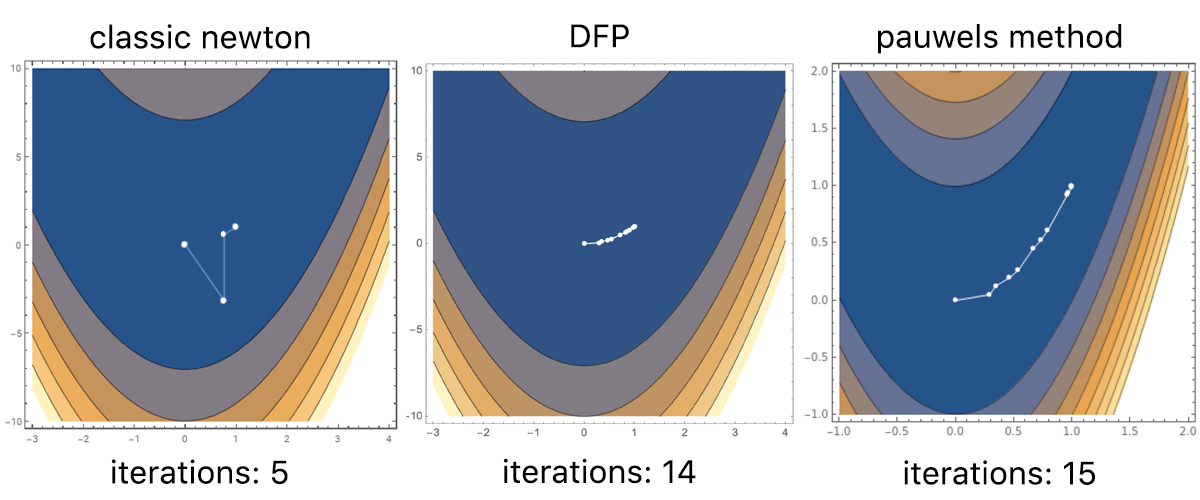

**Давайте теперь взглянем на поведение методов с начальным приближением (15, 15)**

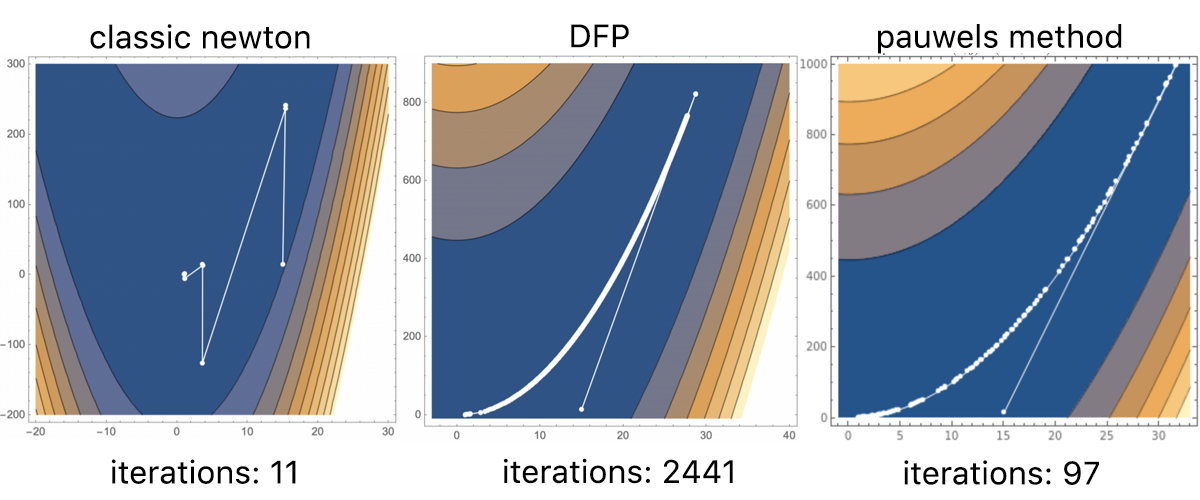




|          |classic newton   | DFP  | pauwels method 
|----------|----|----|----
|(0, 0)|5  | 14 | 15
|(15, 15)|11  | 2441 | 97
 



---



*   **Как видно, классический метод Ньютона отработал лучше всего.** 
*   **Хуже всего отработал метод DFP**



2.   $f(x) = (x_1^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2, \thinspace x^0 = (0, 0)^T$



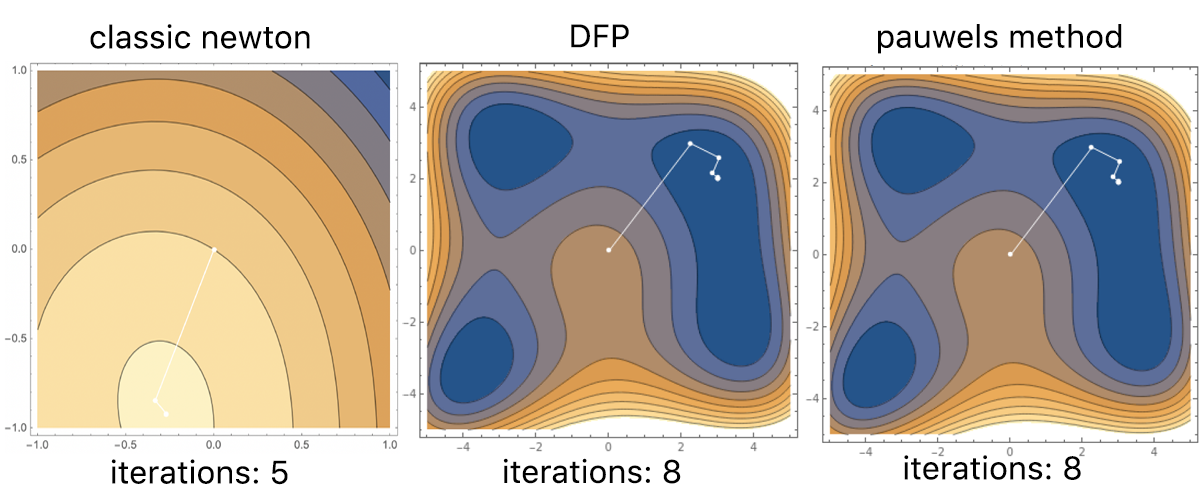

**У этой функции есть несколько точек глобального минимума, поэтому Ньютон сходится к отличной от квазиньютоновских методов точке. Количество операций оказалось сравнимым, также все методы нашли минимум**

3.   $f(x) = (x_1 +10x_2)^2 + 5(x_3 - x_4)^2 + (x_2 - 2x_3)^4 + 10(x_1 - x_4)^4, \thinspace x^0 = (1, 2, 3, 4)^T$

|          |classic newton   | DFP  | pauwels method 
|----------|----|----|----
|Iterations|24  | 51 | 21

***P.S. Очевидно, что в точке (0, 0, 0, 0) - экстремум, поэтому возьмем ненулевую начальную точку.***

***P.P.S. Поскольку график функции в 5-мерном пространстве, давайте воздержимся от его визуализации, приведем лишь количество итераций для сходимости.***

4.   $f(x) = 100 - \frac{2}{1 + (\frac{x_1 - 1}{2})^2 + (\frac{x_2 - 1}{3})^2} - \frac{1}{1 + (\frac{x_1 - 2}{2})^2 + (\frac{x_2 - 1}{8})^2}, \thinspace x^0 = (0, 0)^T$





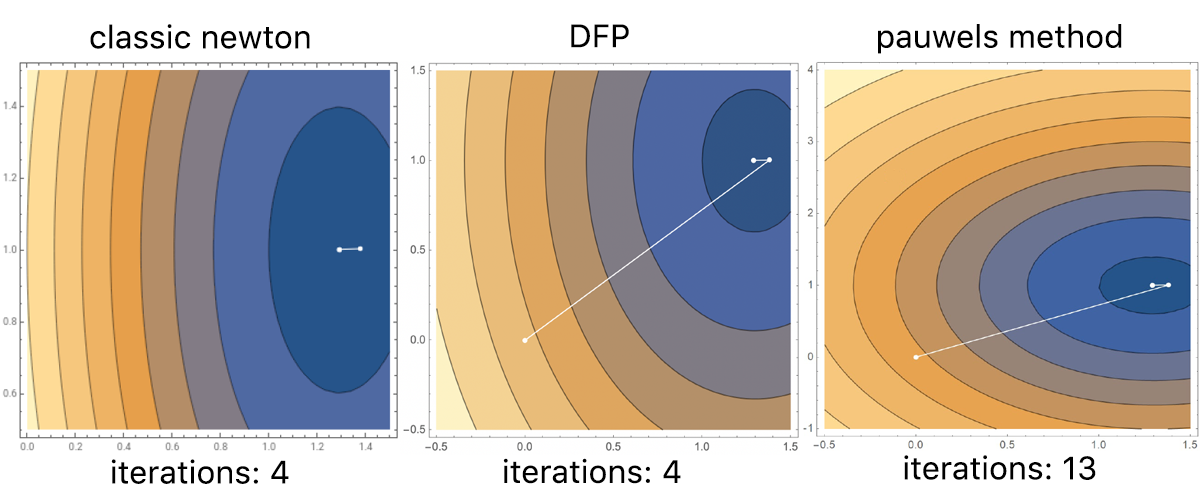

**В ходе данных экспериментов, можно сделать вывод, что лучше использовать классический метод Ньютона, в большинстве случаев он находит минимум за наименьшее количество итераций, чем остальные методы.**

# Вывод


*   **Методы Ньютона стоит использовать, когда у нас есть информация о матрице Гессе.**
*   **Самый эффективный Ньютононвский метод - классический.**
*   **Самым надежный Ньютононвский метод - с направлением спуска.**
*   **Если мы не хотим / не можем обратить матрицу Гессе, можем воспользоваться квазиньютоновскими методами, которые позволяют аппроксимировать обращенный Гессиан.**
*   **Среди квазиньютоновских методов, лучше использовать метод Пауэлла, он показал наилучшие результаты.**